In [ ]:
This report is based on real data of Quantium published by The Forage.
Here are the steps I done to clean the excel file before import on excel : 
    -Create duplicates of files before cleaning 
    -drop duplicates of the file and duplicates of transaction_id
    -separating the weight out of name product
    -Create Weekday column by date 
    -Create PROD_PRI (product price)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#file_path1 = r'C:\DATA\Quantium_project\QVI_transaction_data.xlsx'
#df1 = pd.read_excel(file_path1)
#file_path2 = r'C:\DATA\Quantium_project\QVI_purchase_behaviour.csv'
#df2 = pd.read_csv(file_path2)
#df3 = pd.merge(df1, df2, on='LYLTY_CARD_NBR', how='inner')
#df3 = df3.drop_duplicates(subset='TXN_ID', keep='first') #drop duplicates in transaction id 
file_path = r'C:\DATA\Quantium_project\df3.xlsx'
df3 = pd.read_csv(file_path)

In [10]:
#create using variables : 
#Total Product sold by Customer
customer_product_qty = df3.groupby('LYLTY_CARD_NBR')['PROD_QTY'].agg('sum')
#Total Sales by Customer
customer_total_sales = df3.groupby('LYLTY_CARD_NBR')['TOT_SALES'].agg('sum')
#Total Customer by Store number
store_customer_count = df3.groupby('STORE_NBR')['LYLTY_CARD_NBR'].nunique()
#Customer distribution by life_stage
lifestage_distribution = df3.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].nunique()
#Total sales distribution by life_stage
total_sales_per_lifestage = df3.groupby('LIFESTAGE')['TOT_SALES'].sum()
#the total product sales based on price
price_quantity_agg = df3.groupby('PROD_PRI')['PROD_QTY'].sum()
#the Price distribution of product we got 
product_price_counts = df3.groupby('PROD_PRI')['PROD_NAME'].nunique()
# Group by weekday and calculate the sum of total quantity sales for each day
weekday_quantity_sales = df3.groupby('Weekday')['PROD_QTY'].sum()

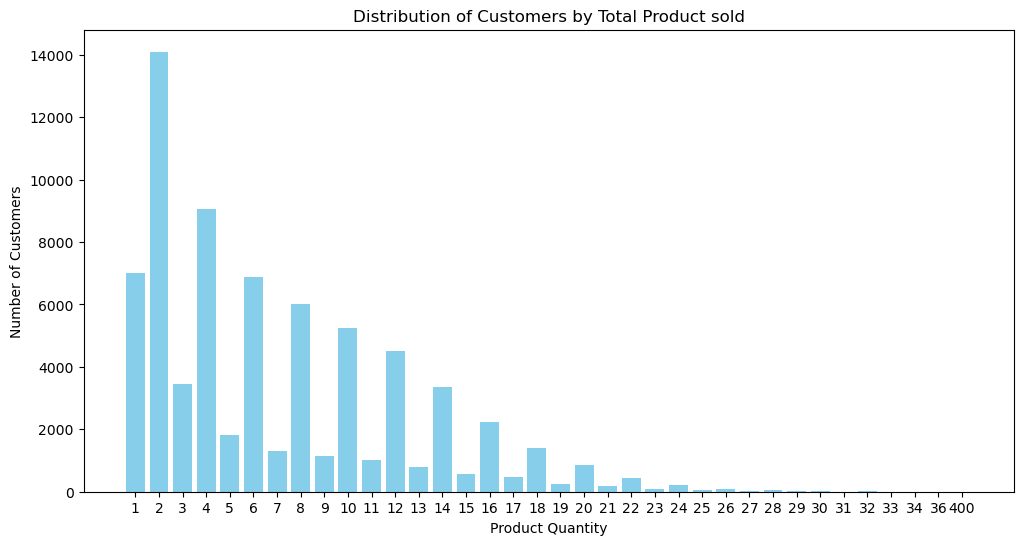

In [4]:
# Total Product sold by Customer
customer_product_qty = df3.groupby('LYLTY_CARD_NBR')['PROD_QTY'].agg('sum')

# Counting the number of customers for each product quantity
customer_qty_distribution = customer_product_qty.value_counts().sort_index()

# Create a categorical x-axis using the product quantities as strings
x_values = [str(x) for x in customer_qty_distribution.index]

# Plotting a bar chart
plt.figure(figsize=(12, 6))
plt.bar(x_values, customer_qty_distribution.values, color='skyblue', width=0.8)

# Adding labels and title
plt.title('Distribution of Customers by Total Product sold')
plt.xlabel('Product Quantity')
plt.ylabel('Number of Customers')

# Display the chart
plt.show()


In [ ]:
The chart above shows that most of our customers tend to buy an even number of total products 

maybe because of the **sales strategy of buying 2/4 products at the same time is working effectively.

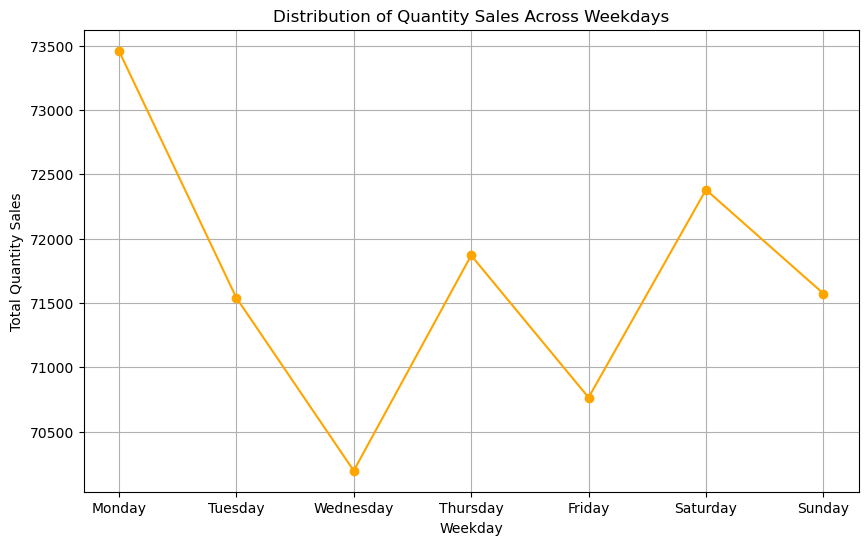

In [15]:
# Plotting a line graph for total quantity sales per weekday
plt.figure(figsize=(10, 6))
weekday_quantity_sales.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_quantity_sales.plot(kind='line', marker='o', color='orange')
plt.title('Distribution of Quantity Sales Across Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Total Quantity Sales')
plt.grid(True)
plt.show()

In [ ]:
This line-graph shows that the quantity sold fluctuate around 70500 to 73500 with Monday and Saturday are the highest 

Wednesday showing the lowest sale performance → apply sales marketing on Wednesday ?

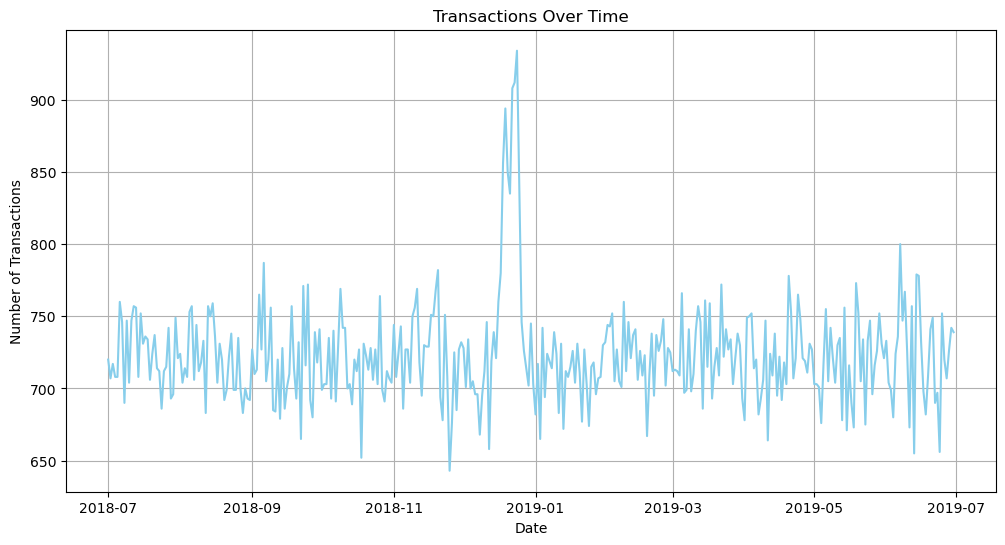

In [6]:
# Convert the 'DATE' column to datetime format
df3['DATE'] = pd.to_datetime(df3['DATE'])

# Group by 'DATE' and count the number of transactions
transactions_over_time = df3.groupby('DATE')['TXN_ID'].count()

# Plotting a line chart
plt.figure(figsize=(12, 6))
plt.plot(transactions_over_time.index, transactions_over_time.values, color='skyblue')
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


In [ ]:
This Graph shows the amount of transaction between 07/2018 to 07/2019.

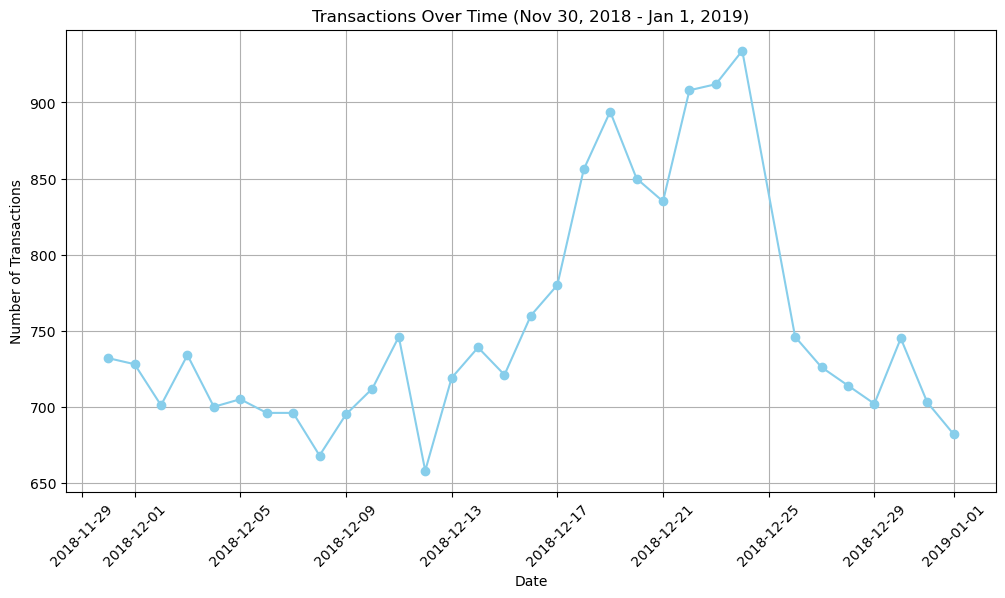

In [8]:
# Convert the 'DATE' column to datetime format
df3['DATE'] = pd.to_datetime(df3['DATE'])

# Filter data for the specified date range
start_date = '2018-11-30'
end_date = '2019-01-01'
filtered_df = df3[(df3['DATE'] >= start_date) & (df3['DATE'] <= end_date)]

# Group by 'DATE' and count the number of transactions
transactions_over_time = filtered_df.groupby('DATE')['TXN_ID'].count()

# Plotting a line chart
plt.figure(figsize=(12, 6))
plt.plot(transactions_over_time.index, transactions_over_time.values, color='skyblue', marker='o')
plt.title('Transactions Over Time (Nov 30, 2018 - Jan 1, 2019)')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
This graph shows the significant raise during christmast

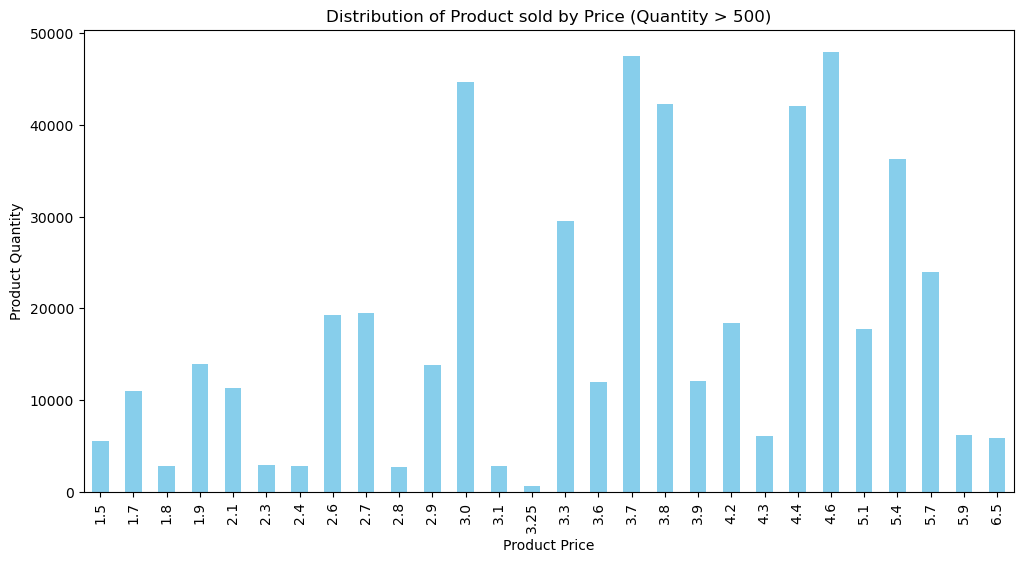

In [16]:
# Grouping by product price and calculating the sum of product quantity
price_quantity_agg = df3.groupby('PROD_PRI')['PROD_QTY'].sum()

# Filtering products with quantity greater than 500
price_quantity_agg_filtered = price_quantity_agg[price_quantity_agg > 500]

# Sorting the results by product price in ascending order
price_quantity_agg_filtered = price_quantity_agg_filtered.sort_index()

# Plotting a bar chart
plt.figure(figsize=(12, 6))
price_quantity_agg_filtered.plot(kind='bar', color='skyblue')
plt.title('Distribution of Product sold by Price (Quantity > 500)')
plt.xlabel('Product Price')
plt.ylabel('Product Quantity')
plt.show()

In [ ]:
This Histogram shows that the best-selling product price are product cost 3 ; 3.7 ; 3.8 ; 4.4 ; 4,6 ; 5,4; 5,7 

→ We can lower the price of other product equal the best selling price for more product sold.

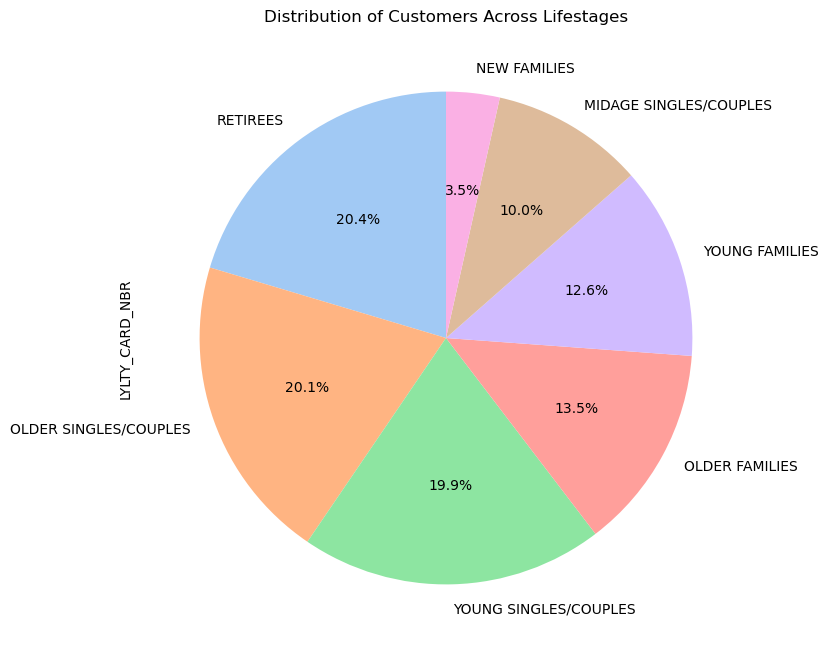

In [17]:

sorted_lifestage_distribution = lifestage_distribution.sort_values(ascending=False)

plt.figure(figsize=(8, 8))
sorted_lifestage_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Customers Across Lifestages')
plt.show()

In [ ]:
This Distribution shows that the LifeStages of our main Customer are quite diverse 
With 3 main lifestages are :  

Singles
Retirees

Couples

Let see the total sales of each customer lifestages to see if there is any different.

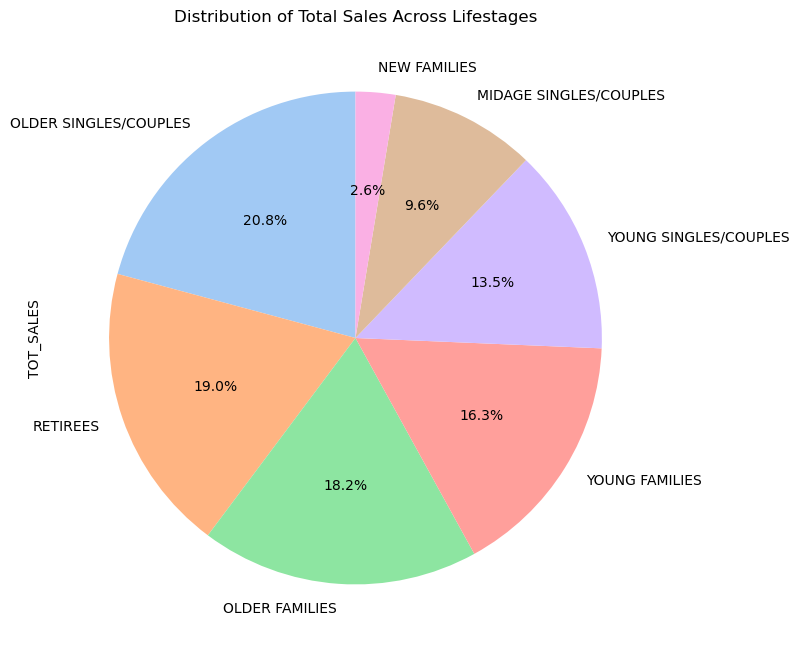

In [18]:
sorted_total_sales_per_lifestage = total_sales_per_lifestage.sort_values(ascending=False)

# Plotting a pie chart for the distribution of total sales across lifestages
plt.figure(figsize=(8, 8))
sorted_total_sales_per_lifestage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Total Sales Across Lifestages')
plt.show()


In [ ]:
So our main customer breaks down more from Singles ,Retirees ,Couples to 

Older Singles/Couples/Families and Retirees 

⇒ The reason behind this might also take more time to investigate , but i can come up with an theory like this : 

Since our product are chips which are a kind of snack , can be refer to as non-essential items, our main customer are 
mostly older singles/couples/families and Retirees since they might have more spare money to spend on new families and 
young/midage singles/couples who prioritize on essential items cause they tend to face financial problems more.

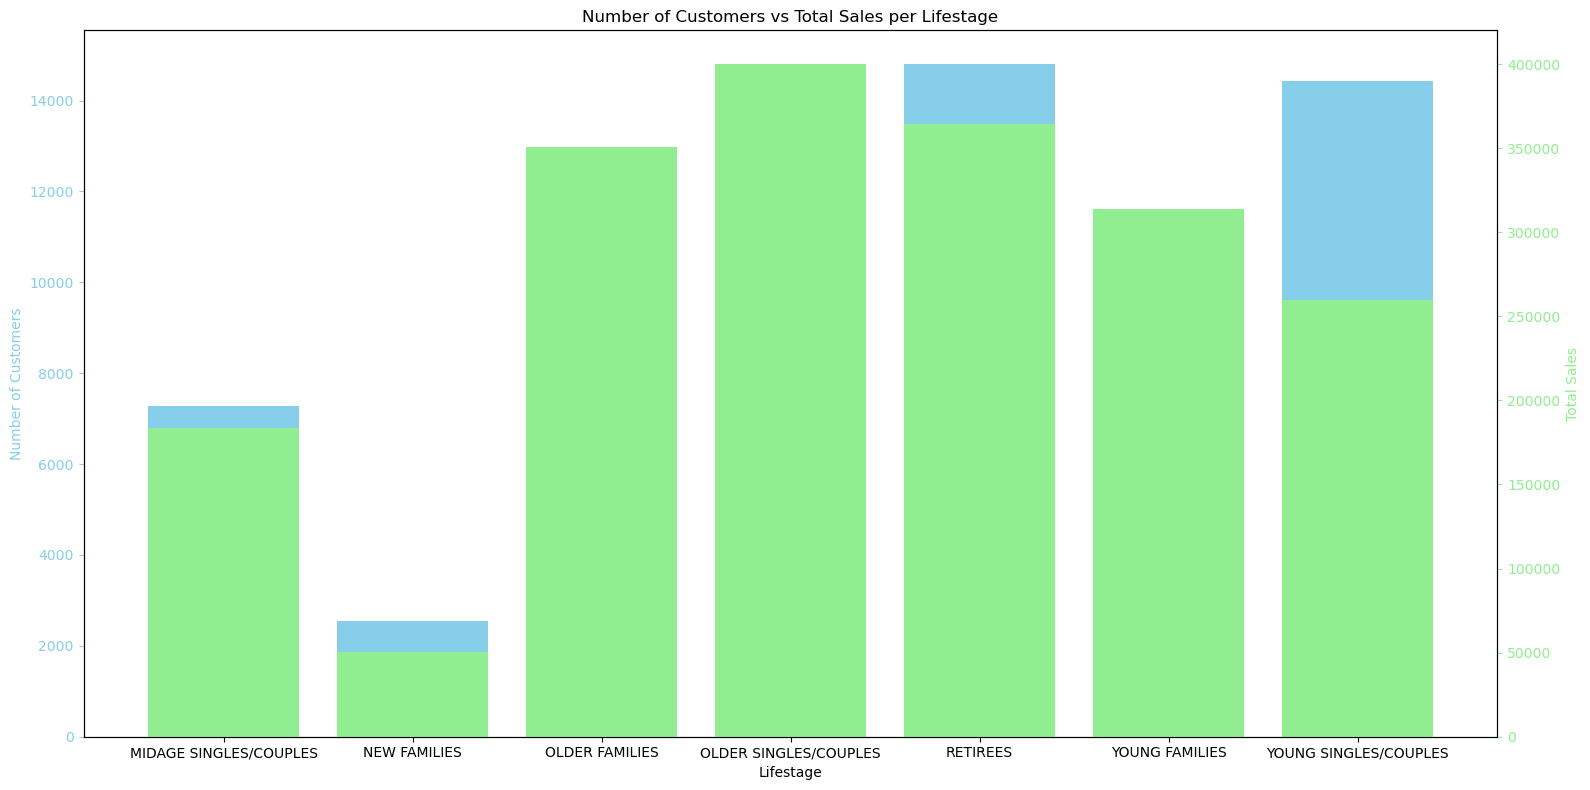

In [19]:
combined_data = pd.DataFrame({'Number of Customers': lifestage_distribution, 'Total Sales': total_sales_per_lifestage})
fig, ax1 = plt.subplots(figsize=(16, 8))

# Bar for number of customers
ax1.bar(combined_data.index, combined_data['Number of Customers'], color='skyblue', label='Number of Customers')
ax1.set_xlabel('Lifestage')
ax1.set_ylabel('Number of Customers', color='skyblue')
ax1.tick_params('y', colors='skyblue')

# Create a second y-axis to plot total sales
ax2 = ax1.twinx()
ax2.bar(combined_data.index, combined_data['Total Sales'], color='lightgreen', label='Total Sales')
ax2.set_ylabel('Total Sales', color='lightgreen')
ax2.tick_params('y', colors='lightgreen')

# Title and legend
plt.title('Number of Customers vs Total Sales per Lifestage')
fig.tight_layout()
plt.show()


In [ ]:
We do have more Young Singles/couples customer than the product they purchased : 

→ this might be our **next potential target** since there could be something that stop them from purchasing
so we need more data to know why but **my theory is because they’re lack of money** so applying sales marketing 
on them to make them be affordable to buy more is a great move.

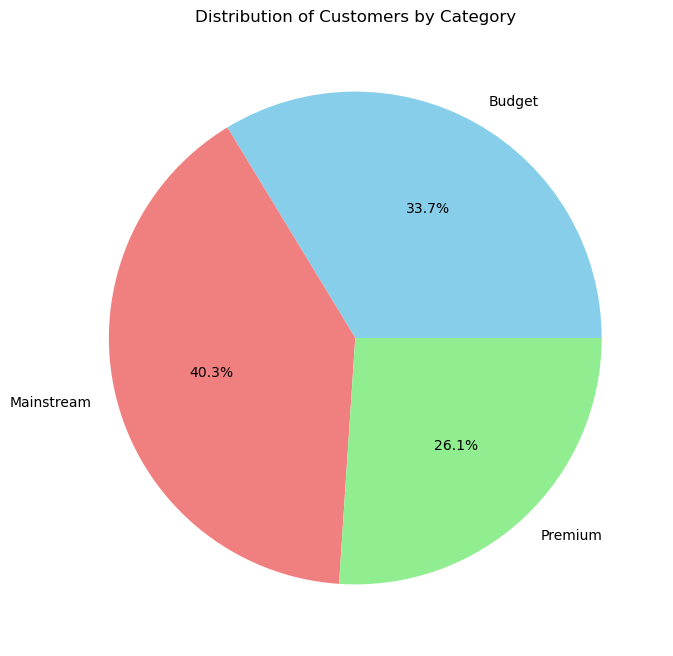

In [6]:
# Counting the number of customers for each PREMIUM_CUSTOMER category
customer_counts_by_category = df3.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].nunique()

# Plotting a pie chart with percentage labels
plt.figure(figsize=(8, 8))
customer_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Customers by Category')
plt.ylabel('')  # Remove the default 'PREMIUM_CUSTOMER' label
plt.show()


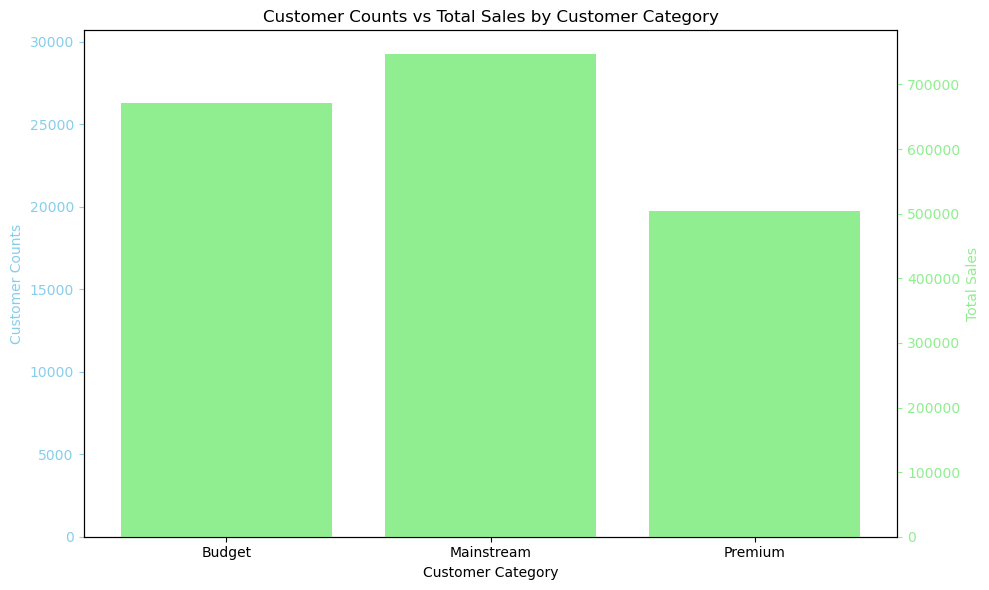

In [7]:
# Grouping by PREMIUM_CUSTOMER and counting the number of unique LYLTY_CARD_NBR
customer_counts_by_category = df3.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].nunique()

# Grouping by PREMIUM_CUSTOMER and calculating the total sales
total_sales_by_category = df3.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].agg('sum')

# Creating a DataFrame with both customer counts and total sales
combined_data = pd.DataFrame({'Customer Counts': customer_counts_by_category, 'Total Sales': total_sales_by_category})

# Plotting a double bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar for customer counts
ax1.bar(combined_data.index, combined_data['Customer Counts'], color='skyblue', label='Customer Counts')
ax1.set_xlabel('Customer Category')
ax1.set_ylabel('Customer Counts', color='skyblue')
ax1.tick_params('y', colors='skyblue')

# Creating a second y-axis to plot total sales
ax2 = ax1.twinx()
ax2.bar(combined_data.index, combined_data['Total Sales'], color='lightgreen', label='Total Sales')
ax2.set_ylabel('Total Sales', color='lightgreen')
ax2.tick_params('y', colors='lightgreen')

# Title and legend
plt.title('Customer Counts vs Total Sales by Customer Category')
fig.tight_layout()
plt.show()


In [ ]:
Our main customer is still the Mainstream customer but the Premium and Budget Customer also takes a huge proportion. 

Let’s divide the category into lifestages for better understanding

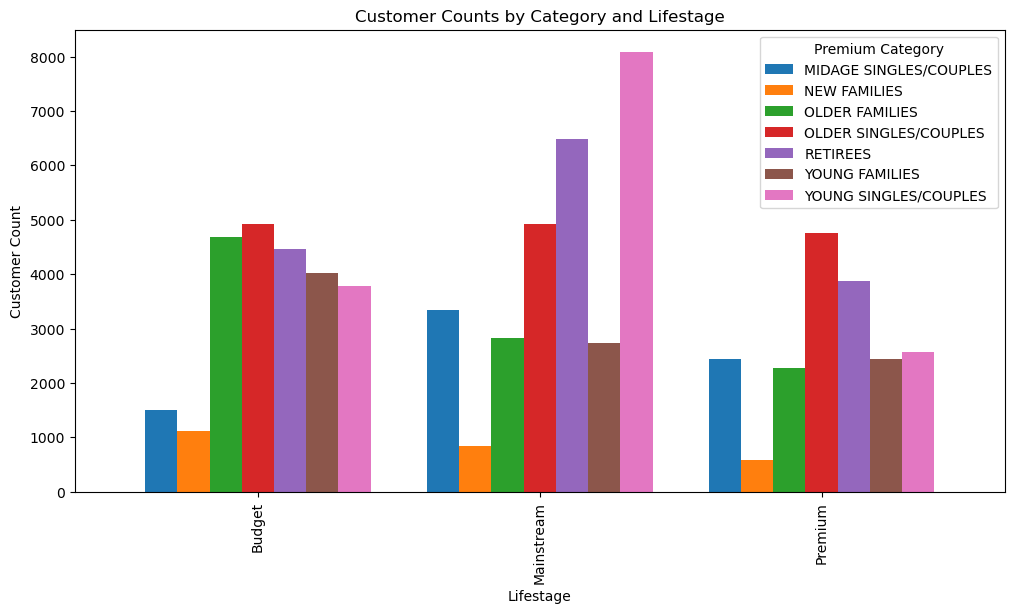

In [11]:
# Customer counts by category and lifestage
customer_counts_by_category_lifestage = df3.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['LYLTY_CARD_NBR'].nunique()

# Unstacking the data to create a pivot table
customer_counts_pivot = customer_counts_by_category_lifestage.unstack()

# Plotting the triple bar chart
customer_counts_pivot.plot(kind='bar', figsize=(12, 6), width=0.8)

# Adding labels and title
plt.title('Customer Counts by Category and Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Customer Count')
plt.legend(title='Premium Category')

# Display the chart
plt.show()

In [ ]:
The revenue of budget-older familes is the highest even though the amount of its customer is much lower compare
to mainstream retiree and young singles/couples. 

The Budget sales looks amazing when compare to the amount of its customer , even though the amount of budget customer
is much lower than mainstream customer , the sales can still be compare peerly.

The Premium and Mainstream sales reflect the exact with the customer they have , the more the customer , the more the sales .

⇒ My theory is the Budget customer will be our potential target because the large amplitude.

If we can raise the amount of budget customer , our sales will grow much higher.

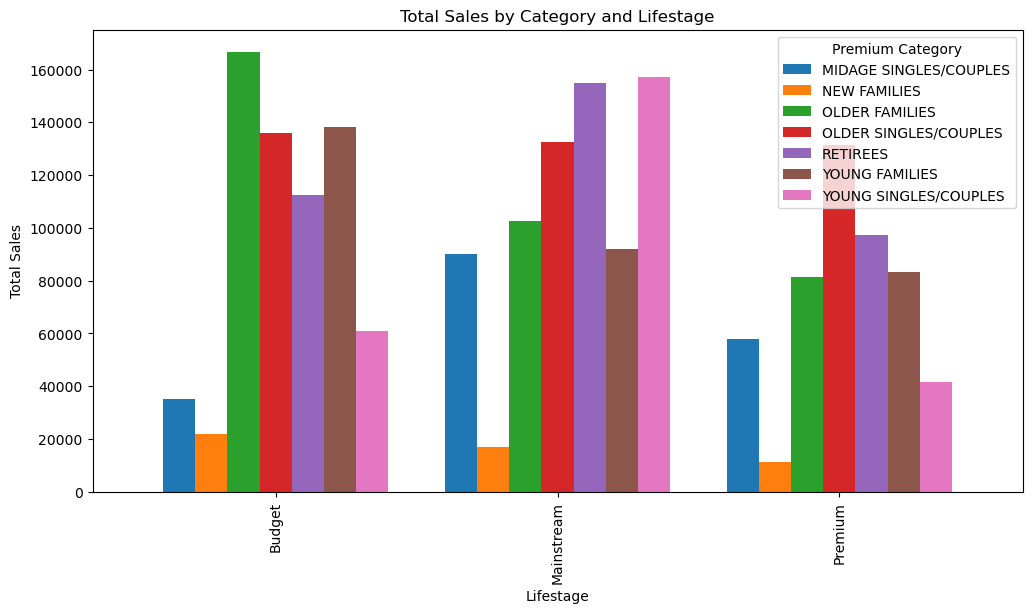

In [30]:
# Total sales by category and lifestage
total_sales_by_category_lifestage = df3.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum()

# Unstacking the data to create a pivot table
total_sales_pivot = total_sales_by_category_lifestage.unstack()

# Plotting the triple bar chart
total_sales_pivot.plot(kind='bar', figsize=(12, 6), width=0.8)

# Adding labels and title
plt.title('Total Sales by Category and Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.legend(title='Premium Category')

# Display the chart
plt.show()


In [ ]:
this chart shows:

- The **budget customer distribute evenly to all category** with older singles/couples being the highest and decrease
slightly to other except midage singles and new families. 

-The **Mainstream customer are mostly young singles/couples with older singles and retirees** follow behind.

 -The Retirees and Older singles are the main premium customer 

To have a clearer point of view in this , we will look at the total sales of chips by category and lifestyle :

In [34]:
# Filter data for Budget customers
budget_customers = df3[df3['PREMIUM_CUSTOMER'] == 'Budget']

# Grouping by product price and calculating the sum of product quantity
budget_product_quantity = budget_customers.groupby('PROD_PRI')['PROD_QTY'].sum()

# Sorting the results by product quantity in descending order
budget_product_quantity = budget_product_quantity.sort_values(ascending=False)

# Displaying the sorted results
print(budget_product_quantity)


PROD_PRI
3.00    16492
3.70    16357
4.60    16329
4.40    14467
3.80    14402
5.40    12623
3.30    10349
5.70     8425
2.60     7242
2.70     7098
4.20     6267
5.10     6115
1.90     5223
2.90     5161
3.90     4206
1.70     4178
2.10     4159
3.60     4029
4.30     2104
5.90     2099
6.50     1978
1.50     1958
2.30     1093
1.80     1066
3.10     1036
2.40     1028
2.80      957
3.25       65
4.60       51
3.30       30
5.10       15
2.80        9
2.30        6
1.32        5
2.20        4
1.45        2
2.55        2
1.65        2
Name: PROD_QTY, dtype: int64


In [ ]:
I want see which kind of product will the budget customer buy most.
this list shows that budget customer will buy product cost around from 3 to 4.6 

My theory is that those product have competitive price and we should focus on why 
and what makes a budget customer buy those.

There’s an outlier in here is the 5.4 also have high quantity sold , there must be 
for a reason like special flavour or some specific sale of its when buying 2 at the same time.